In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D


from sklearn.model_selection import train_test_split

%matplotlib inline

## Logistic regression

### Ex. 1 - Sigmoid function

In [2]:
def sigmoid(z):
    g = np.zeros(len(np.array([z])))
    g = 1 / (1 + math.e**(-z))
    return g

In [3]:
print(sigmoid(0))

0.5


In [4]:
# read in dataset from the course
df = pd.read_csv('/Users/dorotamierzwa/Data Science/Machine Learning - Coursera/machine-learning-ex2/ex2/ex2data1.txt',
                header=None)
df.columns = ['ex1_score', 'ex2_score', 'admission']
df.head()

,ex1_score,ex2_score,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
ex1_score    100 non-null float64
ex2_score    100 non-null float64
admission    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


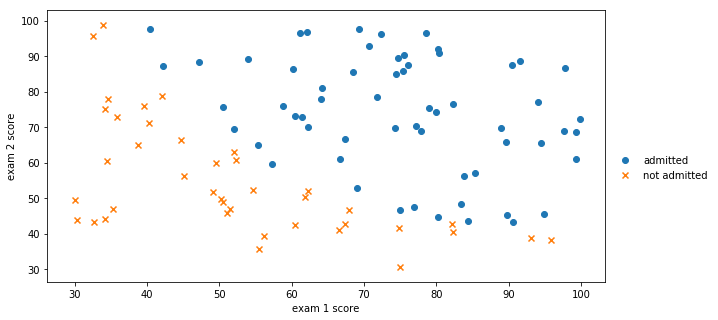

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x=df[df['admission']==1]['ex1_score'], y=df[df['admission']==1]['ex2_score'], marker='o', label='admitted')
ax.scatter(x=df[df['admission']==0]['ex1_score'], y=df[df['admission']==0]['ex2_score'], marker='x', label='not admitted')
plt.legend(bbox_to_anchor=(1.2, 0.5), frameon=False)
ax.set_ylabel('exam 2 score')
ax.set_xlabel('exam 1 score');

### Ex. 2 Cost function and gradient descent

In [7]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
y = y[:,np.newaxis]

In [8]:
y.shape

(100, 1)

In [9]:
m, n = X.shape
ones = np.ones((m,1))
X = np.hstack((ones, X)) 

In [10]:
X.shape

(100, 3)

In [11]:
theta = np.zeros([n+1,1])

In [12]:
theta.shape

(3, 1)

In [13]:
m = len(df)
J = 0
grad = np.zeros(theta.shape)

In [14]:
grad

array([[0.],
       [0.],
       [0.]])

In [15]:
def costFunction(theta, X, y):
    h_theta = sigmoid(np.dot(X, theta))
    log_h = np.log(h_theta)
    log_h_1 = np.log(1 - h_theta)
    res = np.sum(np.dot(-y.T,log_h) - np.dot((1 - y).T, log_h_1))
    J = 1/m * res
    grad = 1/m * np.dot(X.T, (h_theta - y))
    return J, grad

In [16]:
J, grad = costFunction(theta, X, y)

In [17]:
J

0.6931471805599453

In [18]:
grad

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

### Ex. 3 Learning parameters

#### using optimizing function

In [19]:
import scipy.optimize as optimize
opt = optimize.fmin_tnc(func = costFunction, 
                    x0 = theta.flatten(),
                    args = (X, y.flatten()))
theta_optimized = opt[0]
print(theta_optimized)

[-25.16131855   0.20623159   0.20147149]


In [20]:
print(costFunction(theta_optimized, X, y)[0])

0.20349770158947494


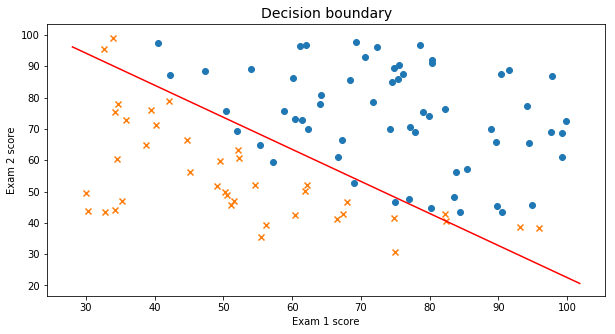

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x=df[df['admission']==1]['ex1_score'], y=df[df['admission']==1]['ex2_score'], marker='o', label='admitted')
ax.scatter(x=df[df['admission']==0]['ex1_score'], y=df[df['admission']==0]['ex2_score'], marker='x', label='not admitted')
x_value= np.array([np.min(X[:,1]-2),np.max(X[:,1])+2])
y_value=-1/theta_optimized[2] * (theta_optimized[1] * x_value + theta_optimized[0])
plt.plot(x_value,y_value, "r")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title('Decision boundary', fontsize=14);

#### using feature normalization and gradient descent

In [22]:
def featureNormalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu)/sigma
    return X_norm

In [23]:
m , n = X.shape
X_norm = featureNormalize(X[:,1:])
ones = np.ones((m,1))
X_norm = np.hstack((ones, X_norm)) 
y = y.reshape(m,1)

In [24]:
X_norm[:5]

array([[ 1.        , -1.60224763,  0.63834112],
       [ 1.        , -1.82625564, -1.2075414 ],
       [ 1.        , -1.53903969,  0.3612943 ],
       [ 1.        , -0.28210129,  1.0863683 ],
       [ 1.        ,  0.69152826,  0.49337794]])

In [25]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta, J_history

In [26]:
theta_optimized2, J_history2 = gradientDescent(X_norm, y, theta, 1, 400)

In [27]:
theta_optimized2

array([[1.65947664],
       [3.8670477 ],
       [3.60347302]])

In [28]:
print(costFunction(theta_optimized2, X_norm, y)[0])

0.203599187610425


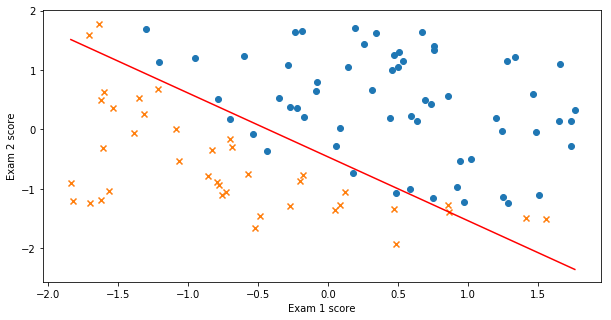

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X_norm[y[:,0]==1, 1], X_norm[y[:,0]==1, 2], marker='o', label='admitted')
ax.scatter(X_norm[y[:,0]==0, 1], X_norm[y[:,0]==0, 2], marker='x', label='not admitted')
x_value= np.array([np.min(X_norm[:,1]),np.max(X_norm[:,1])])
y_value=-1/theta_optimized2[2] * (theta_optimized2[1] * x_value + theta_optimized2[0])
plt.plot(x_value,y_value, "r")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score");

### Ex. 3 Predict

In [30]:
def predict(theta, X):
    X = np.append(np.ones(1), X)
    p = sigmoid(np.dot(X, theta))
    return p

In [31]:
print(predict(theta_optimized, np.array([45, 85])))

0.776290622506148


## Regularized logistic regression

In [32]:
# read in dataset from the course
df2 = pd.read_csv('/Users/dorotamierzwa/Data Science/Machine Learning - Coursera/machine-learning-ex2/ex2/ex2data2.txt',
                header=None)
df2.columns = ['test1', 'test2', 'result']
df2.head()

,test1,test2,result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


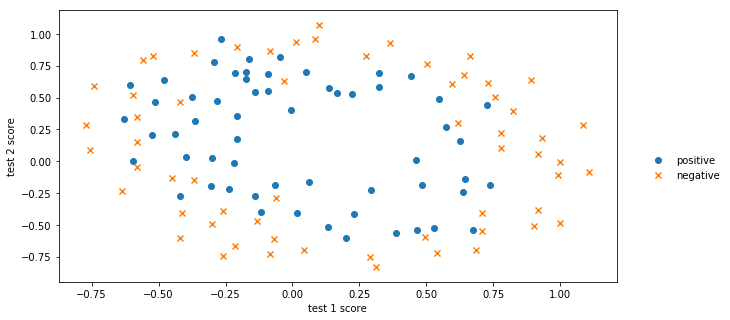

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x=df2[df2['result']==1]['test1'], y=df2[df2['result']==1]['test2'], marker='o', label='positive')
ax.scatter(x=df2[df2['result']==0]['test2'], y=df2[df2['result']==0]['test1'], marker='x', label='negative')
plt.legend(bbox_to_anchor=(1.2, 0.5), frameon=False)
ax.set_ylabel('test 2 score')
ax.set_xlabel('test 1 score');

### Ex. 4 Feature mapping

In [87]:
def mapFeature(X, degree):
    X1 = X[:, 0]
    X1 = X1[:, np.newaxis]
    X2 = X[:, 1]
    X2 = X2[:, np.newaxis]
    out = np.ones(X1.shape)
    for i in range(degree+1):
        for j in range(i+1):
            terms = (X1**(i-j) * X2**j).reshape(len(X1),1)
            out= np.hstack((out, terms))
    return out

In [251]:
X = df2.iloc[:, :2].values
y = df2.iloc[:, 2]

In [252]:
X = mapFeature(X, 6)

In [253]:
X[0]

array([1.00000000e+00, 1.00000000e+00, 5.12670000e-02, 6.99560000e-01,
       2.62830529e-03, 3.58643425e-02, 4.89384194e-01, 1.34745327e-04,
       1.83865725e-03, 2.50892595e-02, 3.42353606e-01, 6.90798869e-06,
       9.42624411e-05, 1.28625106e-03, 1.75514423e-02, 2.39496889e-01,
       3.54151856e-07, 4.83255257e-06, 6.59422333e-05, 8.99809795e-04,
       1.22782870e-02, 1.67542444e-01, 1.81563032e-08, 2.47750473e-07,
       3.38066048e-06, 4.61305487e-05, 6.29470940e-04, 8.58939846e-03,
       1.17205992e-01])

In [254]:
X.shape

(118, 29)

### Ex. 5 Cost function and gradient descent

In [255]:
theta = np.zeros((X.shape[1], 1))

In [256]:
theta.shape

(29, 1)

In [257]:
def costFunctionReg(theta, X, y, lmbda):
    m=len(y)
    J_history =[]
    y = y[:,np.newaxis]
    h_theta = sigmoid(np.dot(X, theta))
    log_h = np.log(h_theta)
    log_h_1 = np.log(1 - h_theta)
    res = np.sum(np.dot(-y.T,log_h) - np.dot((1 - y).T, log_h_1))
    J = 1/m * res
    reg_J= J + lmbda/(2*m) * sum(theta**2)
    grad_0 = 1/m * np.dot(X.T, (h_theta - y))[0]
    grad_1 = 1/m * np.dot(X.T, (h_theta - y))[1:] + (lmbda/m) * theta[1:]
    grad= np.vstack((grad_0[:,np.newaxis],grad_1))

    return reg_J, grad

In [258]:
cost, grad = costFunctionReg(theta, X, y, 1)

In [259]:
cost

array([0.69314718])

In [261]:
def gradientDescentReg(X, y, theta, alpha, num_iters, lmbda):
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta, X, y, lmbda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta, J_history

In [264]:
theta , J_history = gradientDescentReg(X,y,theta,2,500,10)

In [265]:
theta[:5]

array([[ 3.26177888e-01],
       [-4.01184781e-17],
       [-8.15027594e-03],
       [ 1.65797405e-01],
       [-4.46718521e-01]])

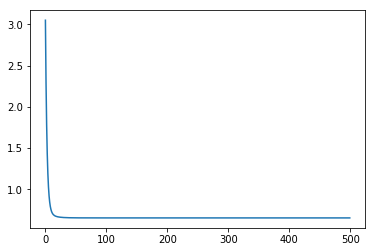

In [266]:
plt.plot(J_history);

In [275]:
def predict(theta,X):
    m = X.shape[0]
    p = np.zeros((m, 1))
    p = sigmoid(X.dot(theta)) >= 0.5
    return p

print("Train accuracy:", round((sum(p==y[:,np.newaxis])/len(y) *100)[0],2),"%")

Train accuracy: 83.05 %
